<h1 style='color:purple' align='center'>Forecasting Real Estate Values with Machine Learning: A Comparative Study of Methods and Attributes of Property structure</h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:blue'>Data Load: Load home prices into a dataframe</h2>

In [2]:
df1 = pd.read_csv('encoded-Property_Valuation_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


### EDA

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

**Drop unwanted features which are not required to build our model**

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00
2,Uttarahalli,3 BHK,1440,2.0,$62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00
4,Kothanur,2 BHK,1200,2.0,$51.00


<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h2 style='color:blue'>Feature Engineering</h2>

**Extract the number of bedrooms from 'size' and add it as new column 'bhk'**

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/var/folders/c4/fgsdyxpj5ns3474k1zj46yw80000gn/T/ipykernel_80871/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440,2.0,$62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00,3
4,Kothanur,2 BHK,1200,2.0,$51.00,2


In [16]:
df3[df3.bhk > 25]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230,27
4684,Munnekollal,43 Bedroom,2400,40.0,660,43


In [17]:
## A 43 bedroom appartment with 2400 T.sqft ... This looks like an error 

In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
## could see range , etc.. needs to be cleaned

**Explore total_sqft feature**

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186,4
122,Hebbal,4 BHK,3067 - 8156,4.0,? 477.00,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,? 54.01,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,? 43.49,2
188,KR Puram,2 BHK,1015 - 1540,2.0,? 56.80,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.5,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.77,2
648,Arekere,9 Bedroom,4125Perch,9.0,265,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.13,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445,4


**So,here total_sqft can be a range (e.g. 3067 - 8156). For such case we can just take average of min and max value of the range. There are other cases such as 34.46Sqm. Just drop such corner cases as they are a minority**

In [22]:
def convert_tsqft_to_num(x):
    nrange = x.split('-')
    if len(nrange) == 2:
        return (float(nrange[0])+float(nrange[1]))/2
    try:
        return float(x)
    except:
        return None   

In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_tsqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,$62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,$95.00,3
4,Kothanur,2 BHK,1200.0,2.0,$51.00,2


**For below row, it shows total_sqft as 5612 which is an average of the range 3067 - 8156**

In [24]:
df4.loc[122]

location          Hebbal
size               4 BHK
total_sqft        5611.5
bath                 4.0
price          ? 477.00 
bhk                    4
Name: 122, dtype: object

In [25]:
##Data set contains column 'price' with different currency types like [$,€,?] and also range (a - b). 

In [26]:
df4[~df4['price'].apply(is_float)].iloc[19:30]

,location,size,total_sqft,bath,price,bhk
19,Manayata Tech Park,2 BHK,1100.0,2.0,$48.00,2
20,Kengeri,1 BHK,600.0,1.0,$15.00,1
21,Binny Pete,3 BHK,1755.0,3.0,$122.00,3
22,Thanisandra,4 Bedroom,2800.0,5.0,$380.00,4
23,Bellandur,3 BHK,1767.0,3.0,$103.00,3
24,Thanisandra,1 RK,510.0,1.0,25.25-30,1
80,Kodanda Reddy Layout,3 BHK,1660.0,2.0,? 105.00,3
82,Yelahanka,2 BHK,1326.0,2.0,? 78.00,2
83,Garudachar Palya,3 BHK,1325.0,2.0,? 60.80,3
84,EPIP Zone,3 BHK,1499.0,5.0,? 102.00,3


In [27]:
# Remove currency symbols
df4['price'] = df4['price'].replace('[\$,€?]', '', regex=True)

# Extract mean from ranges or keep single numeric values
def extract_value(value):
    if '-' in value:
        parts = value.split('-')
        lower = float(parts[0].strip())
        upper = float(parts[1].strip())
        return (lower + upper) / 2
    else:
        return value.strip()

# Apply the extraction function
df4['price'] = df4['price'].apply(extract_value)

# Convert to float and handle NaNs (if any)
df4['price'] = pd.to_numeric(df4['price'], errors='coerce').fillna(0).astype(float)

df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


<h2 style="color:blue">Feature Engineering</h2>

**Add new feature called price per square feet**

In [28]:
df5 = df4.copy()

# Compute 'price_per_sqft'
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']

# Display the first few rows to check the result
df5.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [29]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [30]:
#df5.count()

In [31]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.988347e+03
std      1.070170e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [32]:
len(df5.location.unique())

1298

In [33]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [34]:
#location_stats.values.sum()

In [35]:
#len(location_stats[location_stats>10])

In [36]:
len(location_stats)

1287

In [37]:
len(location_stats[location_stats<=10])

1047

<h2 style="color:blue">Dimensionality Reduction</h2>

**To reduce the number of categories, Any location having less than 10 data points will be named as "other" location. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [38]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [39]:
len(df5.location.unique())

1287

In [40]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [41]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

** Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [42]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [43]:
df5.shape

(13200, 7)

In [44]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [45]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6380.128053
std        9124.612847
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      912343.547691
Name: price_per_sqft, dtype: float64

In [46]:
second_max = df6['price_per_sqft'].nlargest(2).iloc[-1]
second_max

176470.58823529413

In [47]:
df6 = df6[df6['price_per_sqft'] != df6['price_per_sqft'].max()]   ##removed 912343 which is an extreme outlier

In [48]:
df6.price_per_sqft.describe()

count     12455.000000
mean       6307.389119
std        4166.035164
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [49]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10243, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

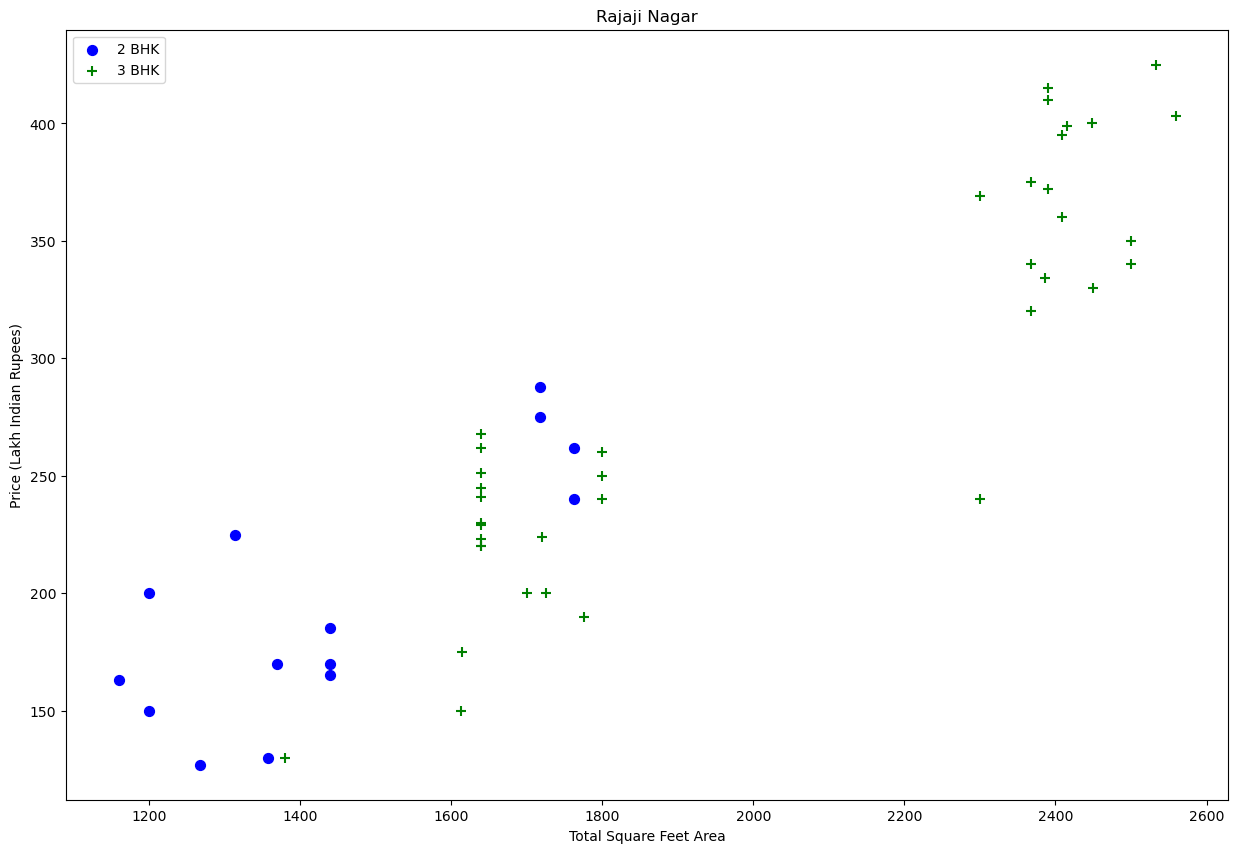

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

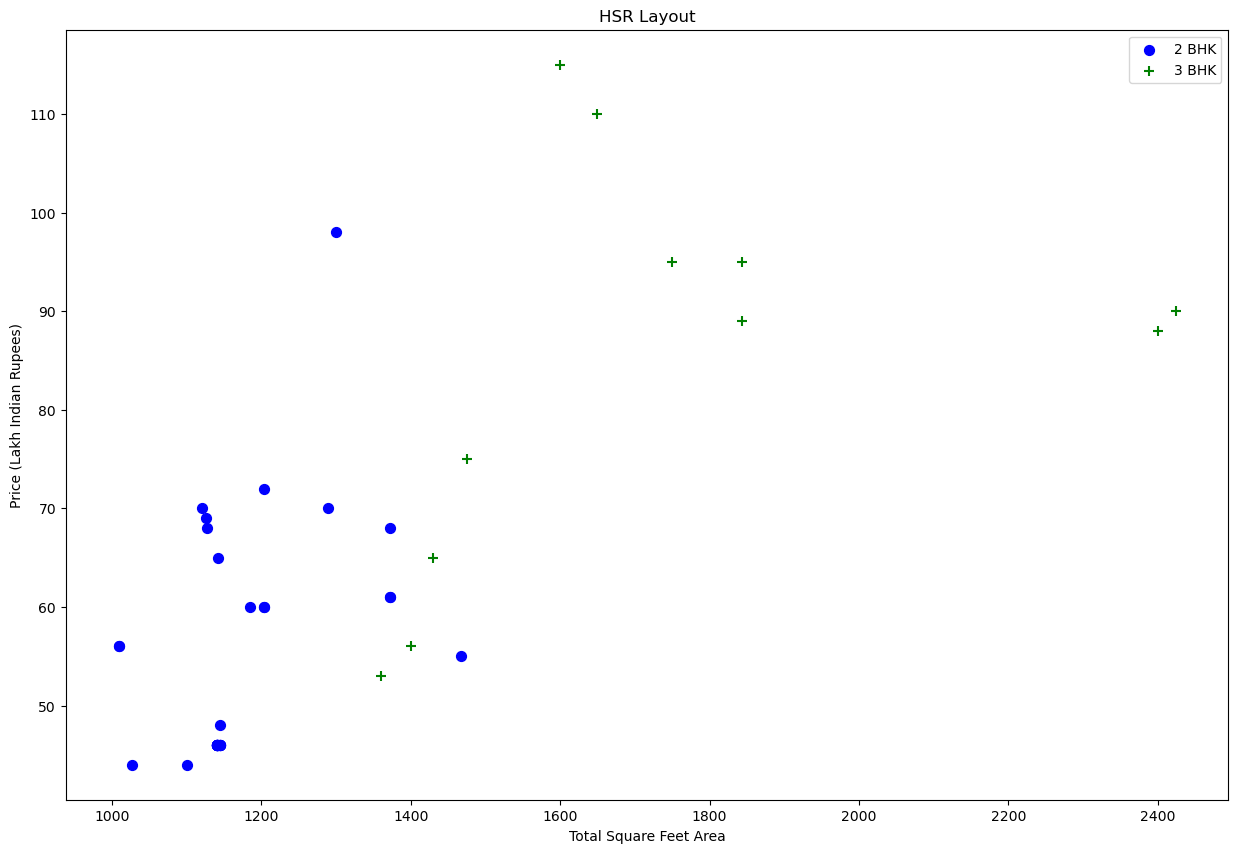

In [51]:
plot_scatter_chart(df7,"HSR Layout")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        #print(bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) 
                #For the current BHK configuration, it identifies properties where the price per square foot is less than the mean price of the previous BHK configuration (bhk-1) [outliers]. 
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

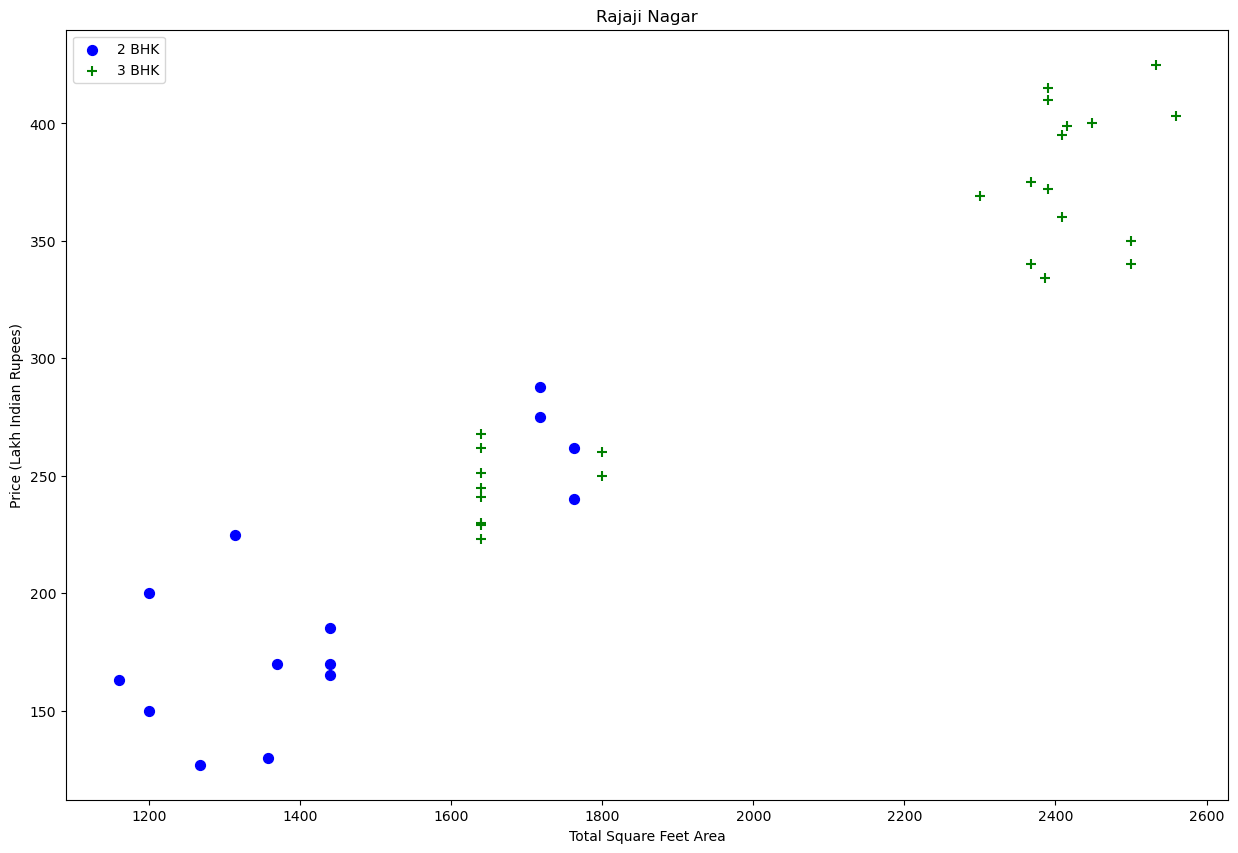

In [53]:
plot_scatter_chart(df8,"Rajaji Nagar")

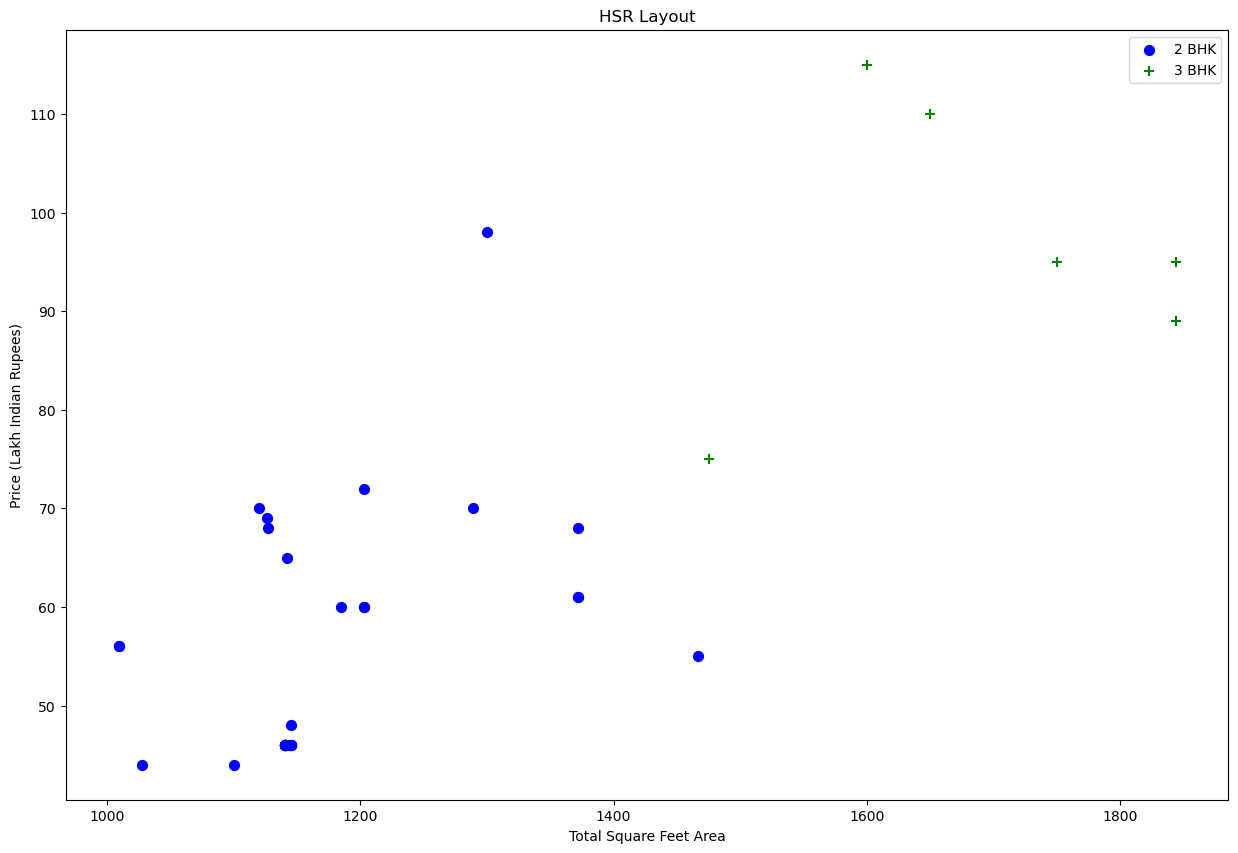

In [54]:
plot_scatter_chart(df8,"HSR Layout")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

Text(0, 0.5, 'Count')

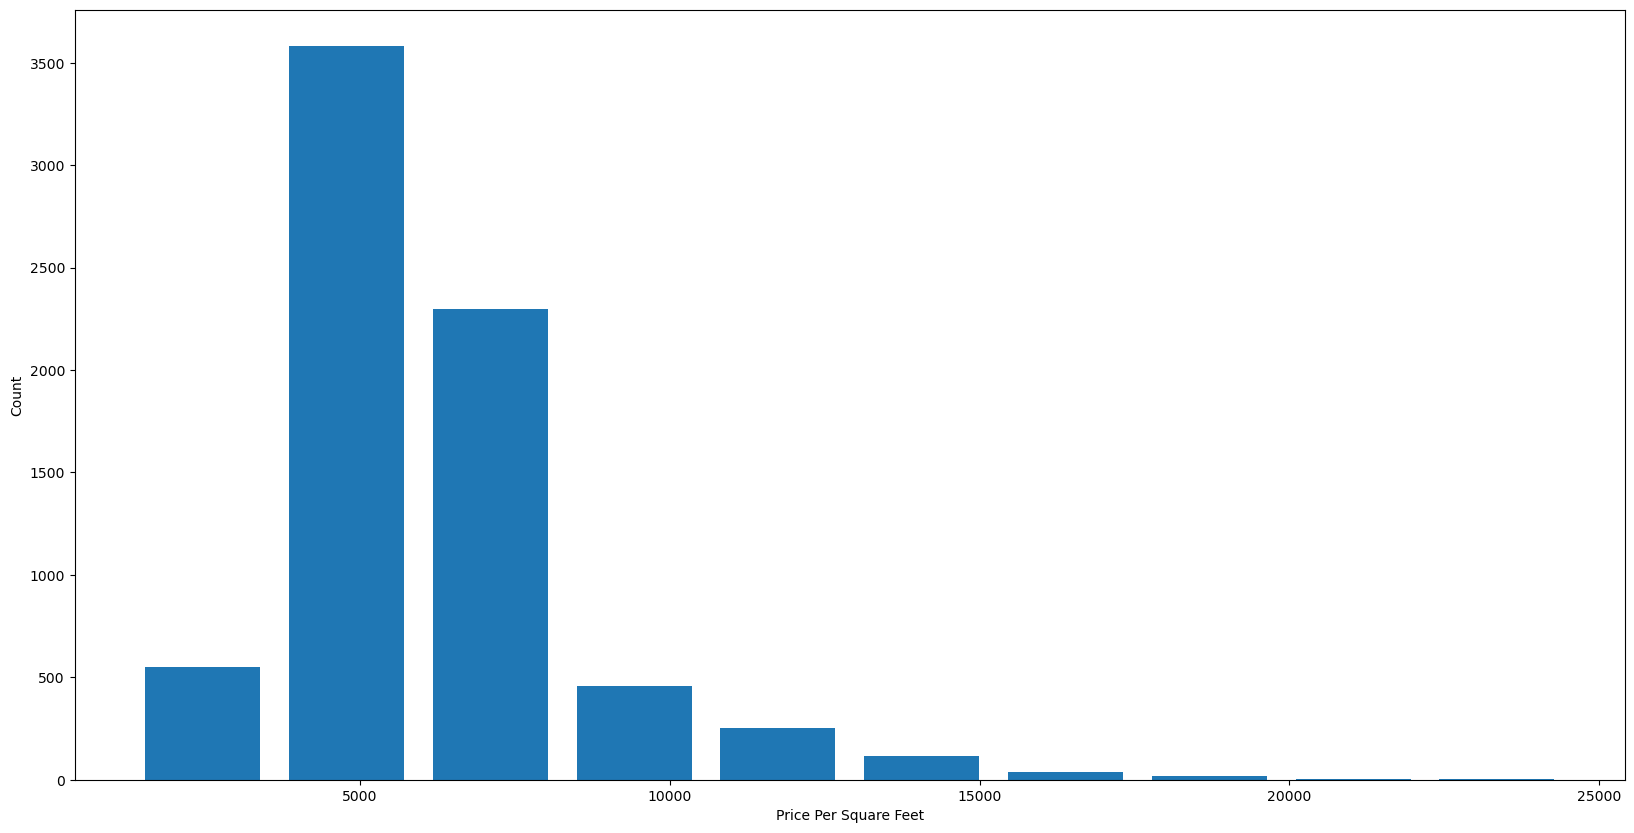

In [55]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [56]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

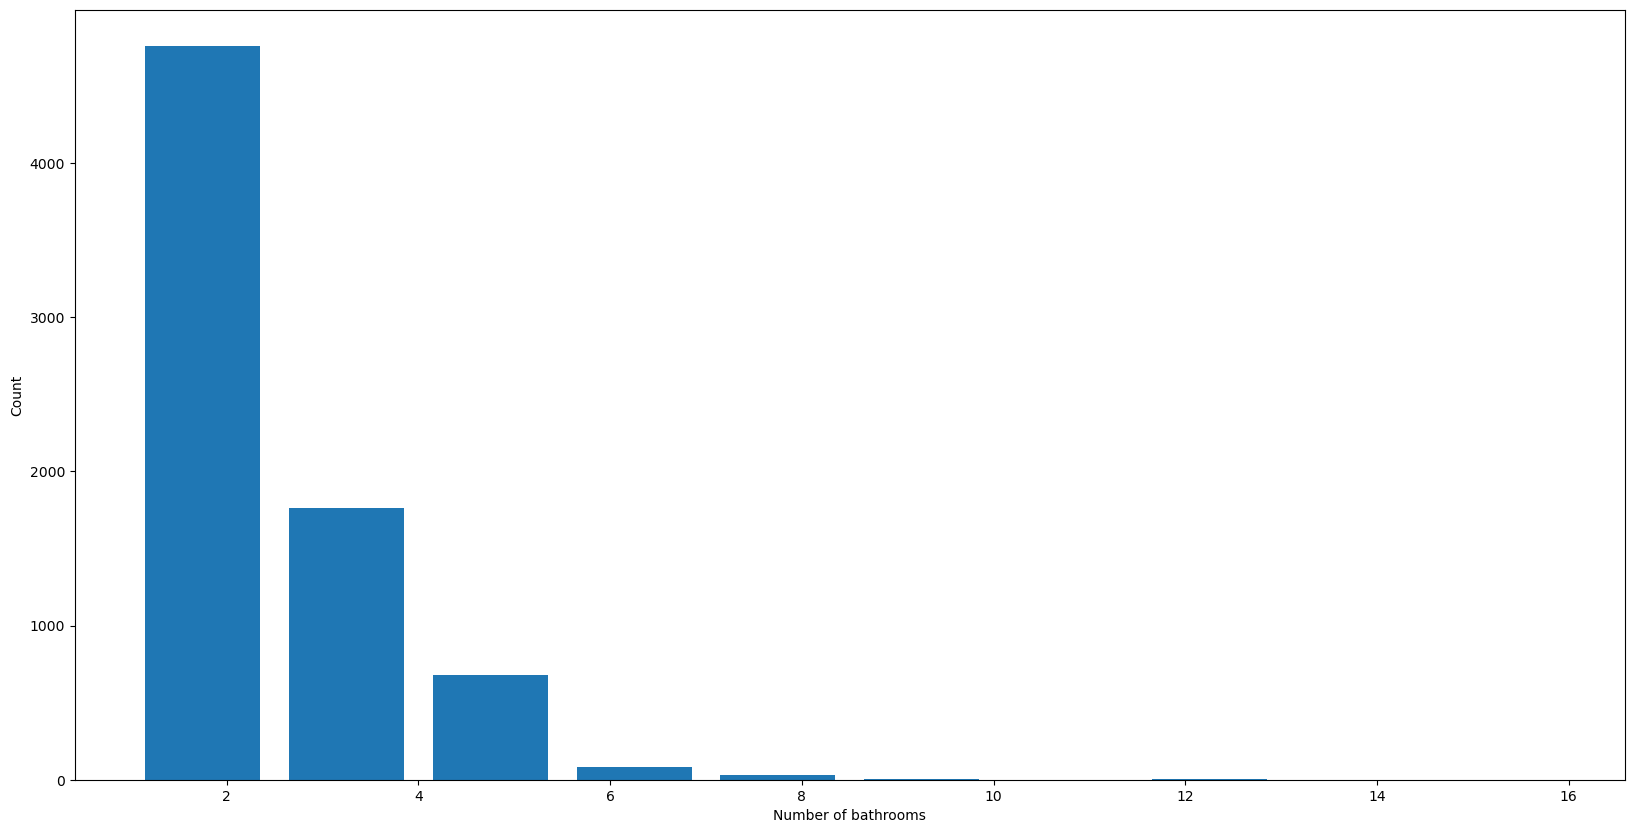

In [57]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [58]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5278,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8484,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8573,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9307,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9638,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [59]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1627,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5239,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6712,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8409,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [60]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [61]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


### Additional Insight: Checking highest price per sqft in various locations

In [62]:
# Ensure 'price_per_sqft' values are in float format
max_price_per_sqft = df9.groupby('location', as_index=False)['price_per_sqft'].max()

# Set display option to avoid scientific notation and show floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the top 10 locations by max 'price_per_sqft'
top_5 = max_price_per_sqft.sort_values(by='price_per_sqft', ascending=False).head(5)

# Display the result
print(top_5)

                  location  price_per_sqft
90           HAL 2nd Stage        24509.80
66         Cunningham Road        23719.17
113           Indira Nagar        21875.00
30   Banashankari Stage II        21250.00
3     2nd Stage Nagarbhavi        18750.00


In [63]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00,4.00,428.00,4
1,1st Block Jayanagar,1630.00,3.00,194.00,3
2,1st Block Jayanagar,1875.00,2.00,235.00,3


<h2 style='color:blue'>Use One Hot Encoding For Location converted to numerical</h2>

In [64]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.00,4.00,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.00,3.00,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.00,2.00,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.00,2.00,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.00,2.00,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.00,4.00,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00,3.00,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model Now...</h2>

In [67]:
df12.shape

(7239, 244)

In [68]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.00,4.00,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00,3.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00,2.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X.shape

(7239, 243)

In [70]:
y = df12.price
y.head(3)

0   428.00
1   194.00
2   235.00
Name: price, dtype: float64

In [71]:
len(y)

7239

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132162095782

## Find Performance table of linear regression model

In [74]:
# Predict on the test set
y_pred = lr_clf.predict(X_test)
y_pred

array([123.6889246 ,  79.12706279,  76.75784804, ...,  58.55487304,
        99.44226498, 135.74096821])

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # number of observations
p = X.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Create the performance table
performance_table = {
    "R²": r2,
    "Adjusted R²": adj_r2,
    "MAE": mae,
    "MSE": mse,
}

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame([performance_table])

# Display the performance table
print(performance_df)

    R²  Adjusted R²   MAE    MSE
0 0.86         0.84 16.16 711.06


In [76]:
# If R² = 0.86, it means 86% of the variability in house prices 
# can be predicted by the model, while the remaining 20% is 
# due to factors not included in the model.

# Adjusted R² does the same but adjusts for the number of 
# predictors (features) in the model. It makes sure that 
# just adding more predictors doesn’t falsely improve the score.

In [77]:
# MAE : It’s the average of the absolute differences between 
# the predicted and actual values.
# Example: If MAE is 16.16, on average, the model’s predictions 
# are off by 16.16 units from the actual values.

# MSE (Mean Squared Error) is the average of the squared 
# differences between predicted and actual values.

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702443, 0.86027167, 0.85322164, 0.84364573, 0.85480206])

**We can see that in 5 iterations we get a score above 80% all the time. This is good but we will test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [79]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
                ('model', LinearRegression())
            ]),
            'params': {
                'model__fit_intercept': [True, False],
                'model__positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
# X and y should be your feature matrix and target vector respectively
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.85,"{'model__fit_intercept': True, 'model__positiv..."
1,lasso,0.73,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.72,"{'criterion': 'squared_error', 'splitter': 'be..."


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [80]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [81]:
np.where(X.columns == 'Vishveshwarya Layout')[0][0]

234

In [82]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1    #because location is one hot encoded

    return lr_clf.predict([x])[0]

In [83]:
predict_price('2nd Stage Nagarbhavi',2000, 3, 2)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


268.03963976451007

In [84]:
predict_price('2nd Stage Nagarbhavi',1000, 2, 1)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.70738334969707

In [85]:
predict_price('Indira Nagar',1000, 2, 2)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31266256478932

In [86]:
predict_price('Indira Nagar',2000, 3, 3)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


275.64491897960227

In [87]:
predict_price('Indira Nagar',2000, 2, 2)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


273.4307270990026

In [88]:
predict_price('HSR Layout',2000, 2, 2)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


117.74540521928888

In [89]:
predict_price('HSR Layout',2000, 1, 1)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.53121333868927

In [90]:
predict_price('Indira Nagar',2000, 1, 1)

/Users/vineethaalexander/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


271.216535218403

### Exporting tested model to Pickle file 

In [91]:
import pickle
with open('forecasting_real_estate_values_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)